# [ 손실 곡선]

In [27]:
# MNIST 데이터셋을 적재하고 훈련세트와 검증 세트로 나눔

import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [28]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것

In [29]:
model = model_fn()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# fit() 메서드의 결과를 history 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

KeyboardInterrupt: 

[ verbose = 0 이란? ]  
verbose 매개변수는 훈련 과정 출력을 조절한다.  
기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다.  
2로 바꾸면 진행 막대를 빼고 출력 된다.

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


history 딕셔너리 안에는 정확도와 손실이 포함되어 있는 것을 확인

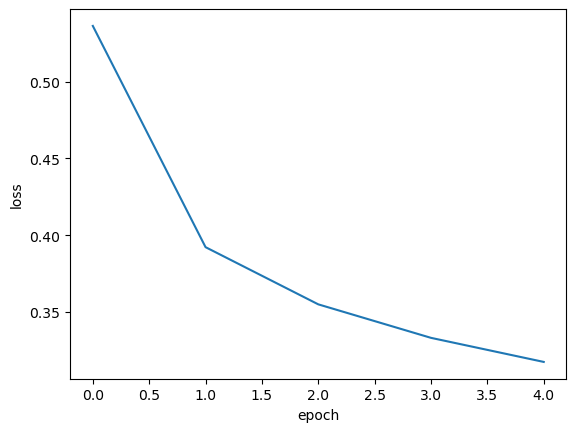

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

손실 그래프를 그려보았다.  
x 축에 에포크 (5개의 에포크지만 리스트의 인덱스는 0부터 시작하므로 4까지 표현됨)  
y 축에 계산된 손길 값

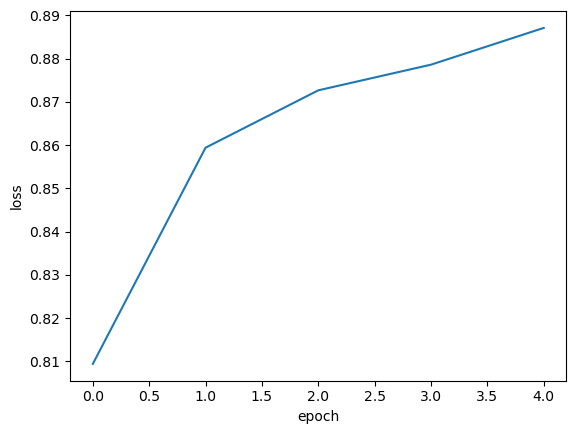

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크 마다 손실이 감소하고 정확도가 향상하는 것을 확인

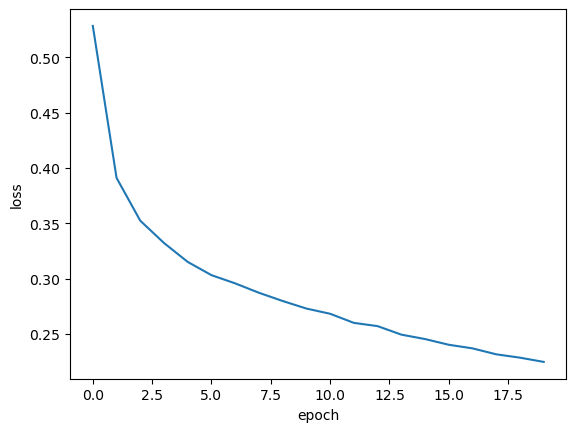

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# [ 검증 손실 ]

*여기서는 손실을 사용하여 과대/과소적합을 다룬다.  

*손실을 사용하는 것과 정확도를 사용하는 것에는 어떤 차이가 있나?  
-인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수  
-손실 감소에 비례하여 정확도가 높아지지 않는 경우도 존재  
-따라서 모델이 잘 훈련되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인하는 것이 좋음

In [ ]:
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


검증 세트에 대한 손실은 'val_loss'에 정확도는 'val_accuracy'

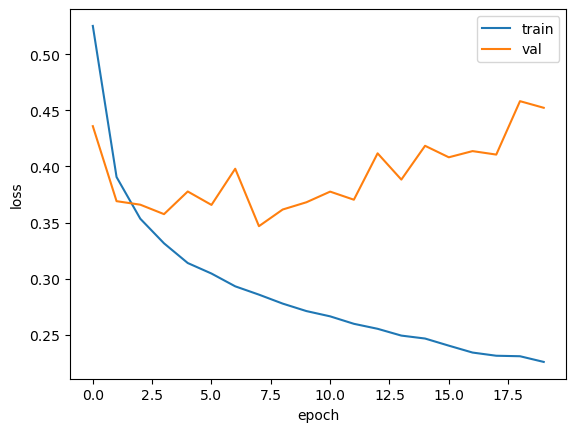

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

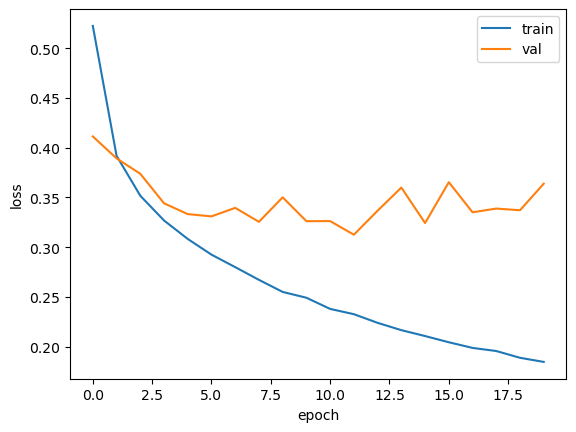

In [ ]:
# Adam 옵티마이저를 적용

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# [ 드롭아웃 ]  
:훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런의 출력을 0으로 만들어) 과대적합을 막는 것

In [ ]:
# model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가하고 30% 정도 드롭아웃을 진행

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

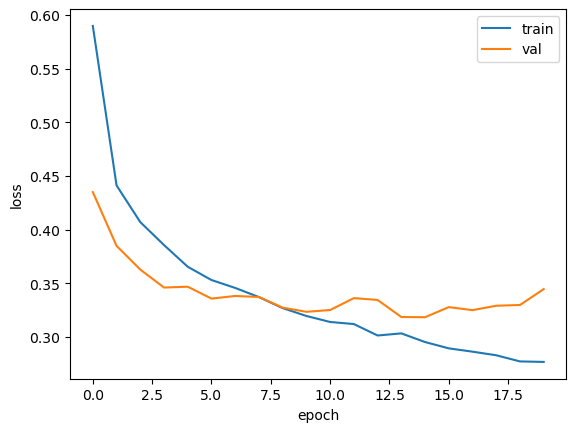

In [ ]:
# 평가와 예측 모델을 사용할 때는 드롭아웃이 적용되지 않는다.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

과대적합이 줄었음을 확인  
열번째 정도에서 검증 손실의 감소 멈추지만 상승하지 않고 유지  
이 모델은 20번의 에포크 동안 훈련 했기 때문에 다소 과대적합
에포크 횟수 10회로 다시 훈련을 하자

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

케라스 모델은 모델 구조와 파라미터를 함께 저장하는 save() 메서드를 제공  
이 메서드는 .keras 확장자를 가진 파일에 필요한 정보를 모두 압축하여 저장

In [ ]:
model.save('model-whole.keras')

In [ ]:
model.save_weights('model.weights.h5')

In [ ]:
!ls -al model*

-rw-r--r-- 1 oracle oracle 979389 Nov 20 23:17 model-whole.keras
-rw-r--r-- 1 oracle oracle 976600 Nov 20 23:18 model.weights.h5


[ 두 가지 실험 ]  
(1) 훈련을 하지 않은 새로운 모델을 만들고 model-weigh.h5 파일에서 훈련된 파라미터를 읽어서 사용  
(2) 아예 model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재

패션 MNIST 데이터셋에서 검증 세트의 샘플 개수는 12,000개이기 때문에 (12000, 10) 크기의 배열을 반환  
10개의 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해본다

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
0.88175


메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax()함수를 사용  
예를 들어 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환한다.  
argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 고른다.  
검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.

In [31]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss: 0.3382


[0.3447032868862152, 0.8817499876022339]

# [ 콜백 ]  
: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [34]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.3087


[0.31177252531051636, 0.8888333439826965]

조기종료: 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각 가능  
  
patience = 2 로 지정하면 2번 연속 검증 점수가 향상 되지 않으면 훈련을 중지

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [36]:
# 몇 번째 에포크에서 훈련이 중지 되었는지 확인 가능

print(early_stopping_cb.stopped_epoch)

6


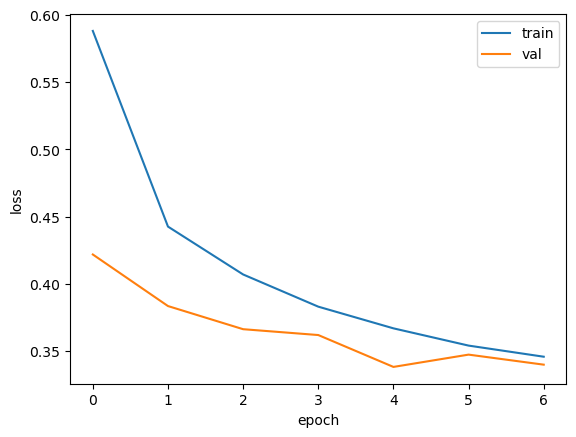

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8769 - loss: 0.3351


[0.33833059668540955, 0.8756666779518127]